In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [58]:
df = pd.read_csv("C:/Users/sbson/Downloads/insurance (1).csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df1 = df.copy()     # We took a copy of our original data because we will be working on it.

In [62]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
df.describe(exclude = 'object').style.background_gradient(cmap='BuPu')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Relationship Between Age and Medical Expenses:

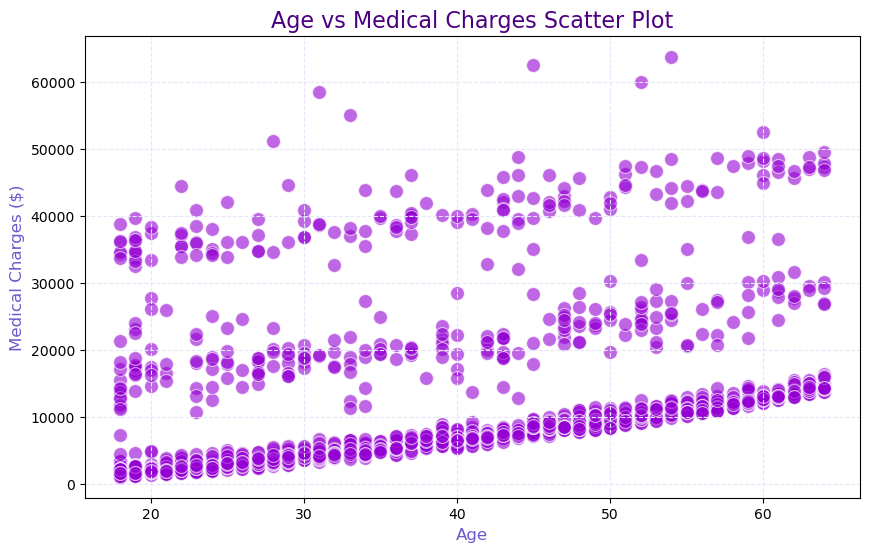

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x="age", 
    y="charges", 
    color='darkviolet', 
    alpha=0.6, 
    edgecolor='white', 
    s=100
)

plt.title("Age vs Medical Charges Scatter Plot", fontsize=16, color='indigo')
plt.xlabel("Age", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()


### Gender and Average Medical Expenses

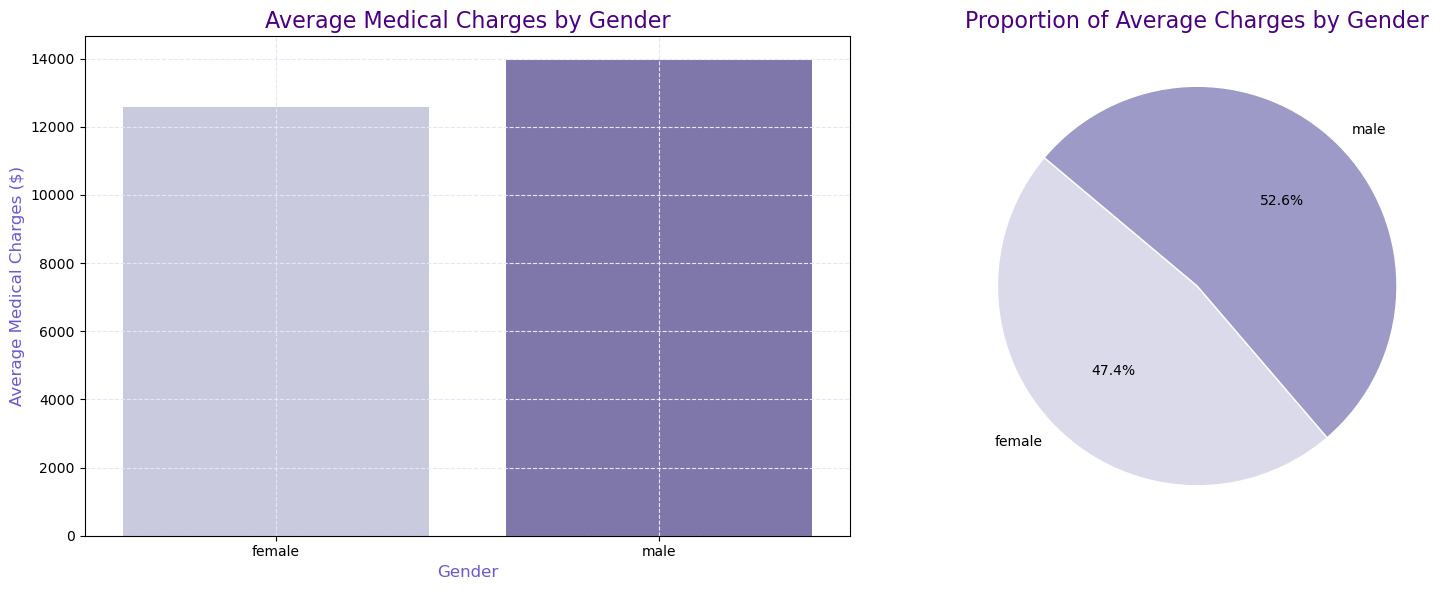

In [72]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
colors = sns.color_palette("Purples", 3) 

sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Gender", fontsize=16, color='indigo')
axes[0].set_xlabel("Gender", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')


axes[1].pie(
    average_charges_by_sex['charges'], 
    labels=average_charges_by_sex['sex'], 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Gender", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

### Relationship Between BMI and Medical Expenses:

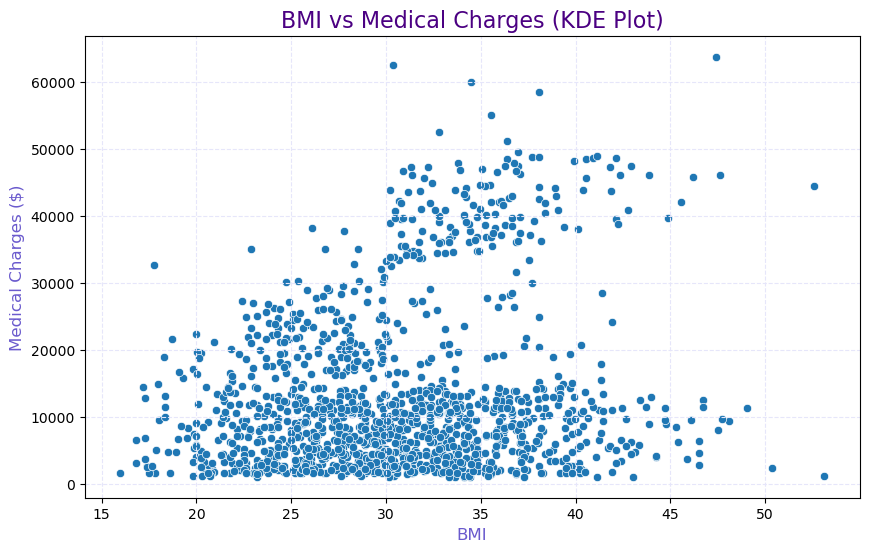

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x="bmi", 
    y="charges", 
    cmap="Purples"       
)
plt.title("BMI vs Medical Charges (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

### Comparison of Smokers and Non-Smokers:

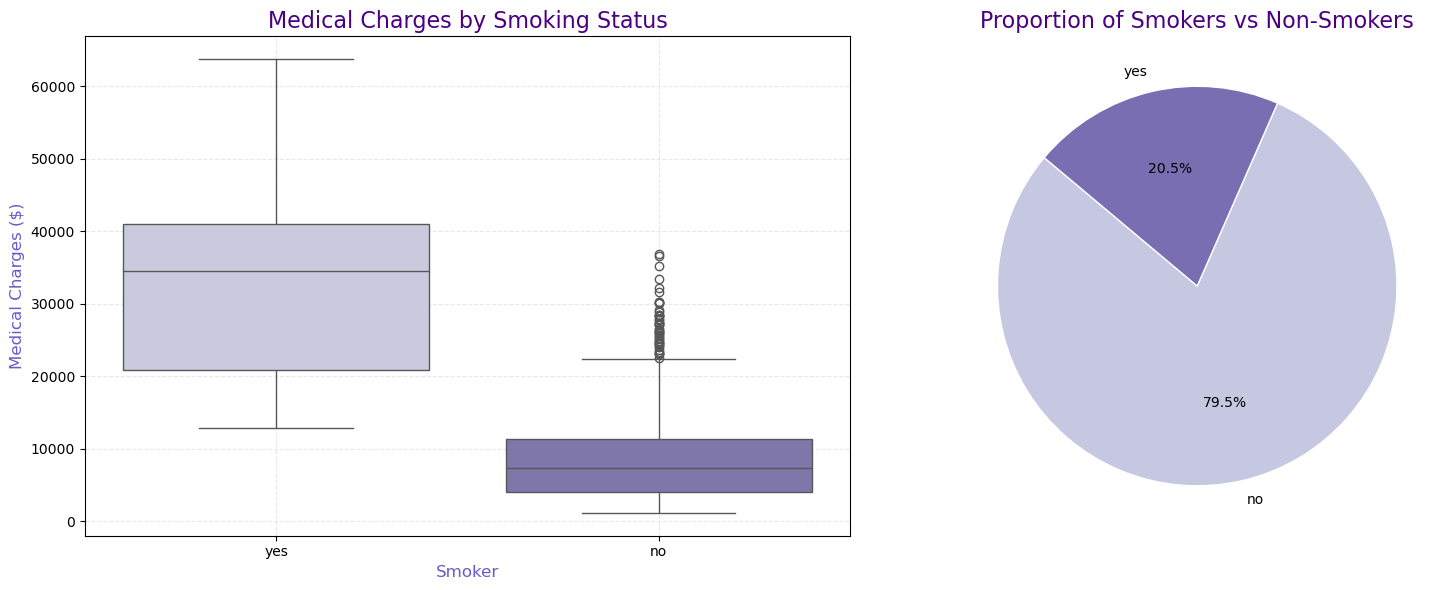

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 2)  

sns.boxplot(ax=axes[0], data=df, x="smoker", y="charges", palette="Purples")
axes[0].set_title("Medical Charges by Smoking Status", fontsize=16, color='indigo')
axes[0].set_xlabel("Smoker", fontsize=12, color='slateblue')
axes[0].set_ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

smoker_counts = df['smoker'].value_counts()
axes[1].pie(
    smoker_counts, 
    labels=smoker_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Smokers vs Non-Smokers", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

### Cost Analysis by Region:


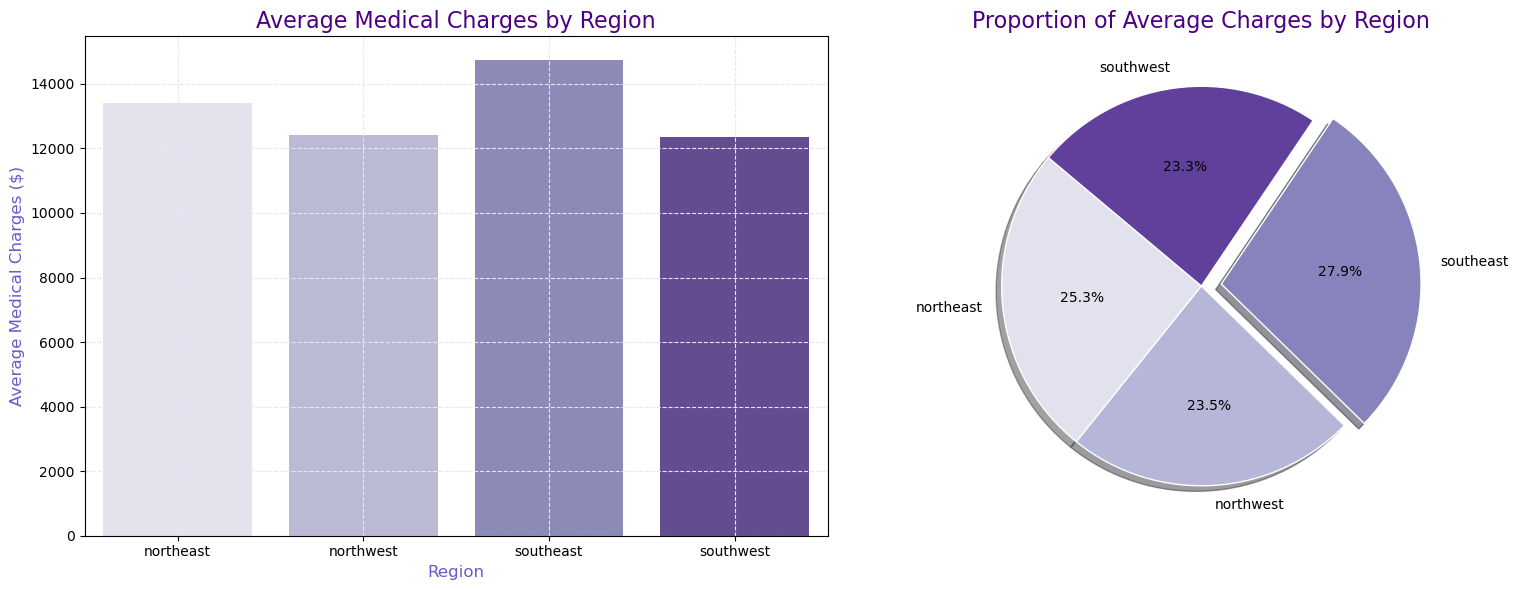

In [81]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 
colors = sns.color_palette("Purples", len(average_charges_by_region))  


sns.barplot(ax=axes[0], data=average_charges_by_region, x="region", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Region", fontsize=16, color='indigo')
axes[0].set_xlabel("Region", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_region['charges']
regions = average_charges_by_region['region']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))] 
axes[1].pie(
    charges, 
    labels=regions, 
    autopct='%1.1f%%', 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Region", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


### Relationship Between Number of Children and Expenses:

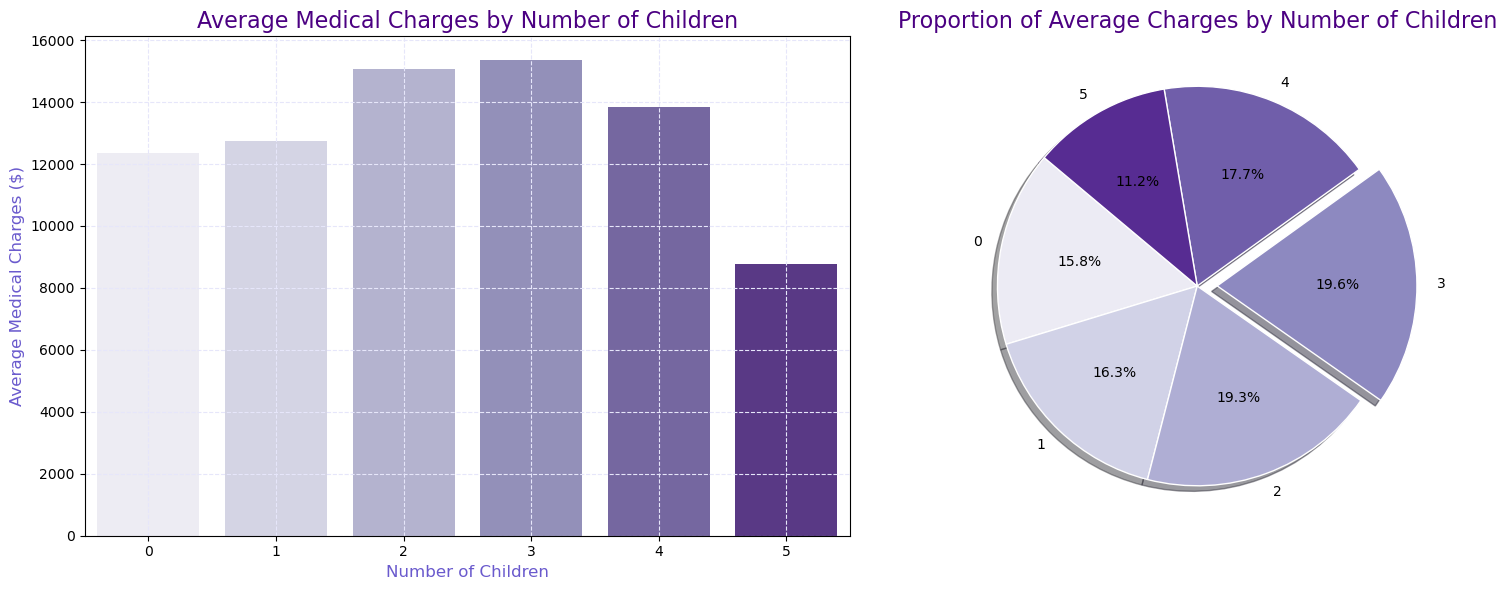

In [84]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  
colors = sns.color_palette("Purples", len(average_charges_by_children))  


sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Number of Children", fontsize=16, color='indigo')
axes[0].set_xlabel("Number of Children", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_children['charges']
children = average_charges_by_children['children']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))] 
axes[1].pie(
    charges, 
    labels=children, 
    autopct='%1.1f%%', 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    startangle=140, 
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Number of Children", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


### Combined Effect of Smoking, BMI and Expenses:

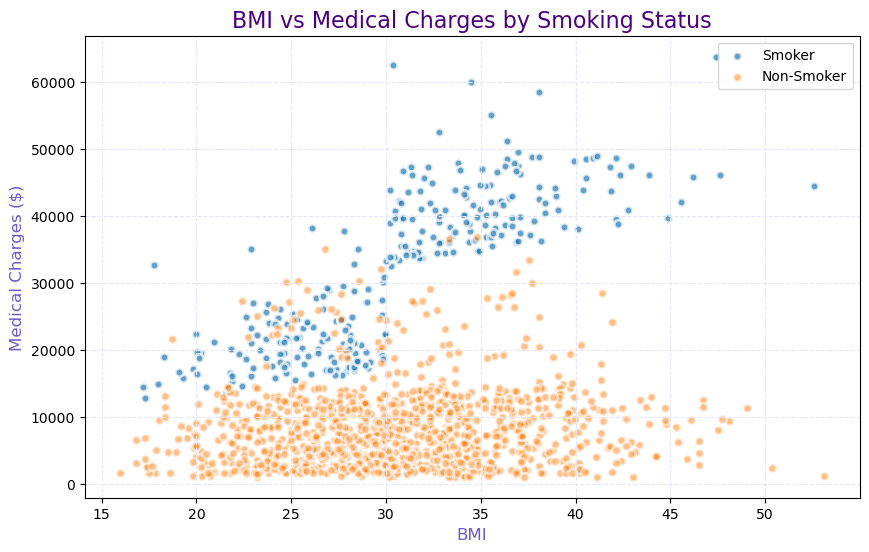

In [87]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df[df['smoker'] == 'yes'], 
    x="bmi", 
    y="charges", 
    cmap="Purples",   
    alpha=0.7, 
    label="Smoker",
    linewidth=2
)

sns.scatterplot(
    data=df[df['smoker'] == 'no'], 
    x="bmi", 
    y="charges", 
    cmap="Blues",   
    alpha=0.5, 
    label="Non-Smoker",
    linewidth=2
)

plt.title("BMI vs Medical Charges by Smoking Status", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, linestyle='--', color='lavender')
plt.legend()
plt.show()


<Figure size 600x400 with 0 Axes>

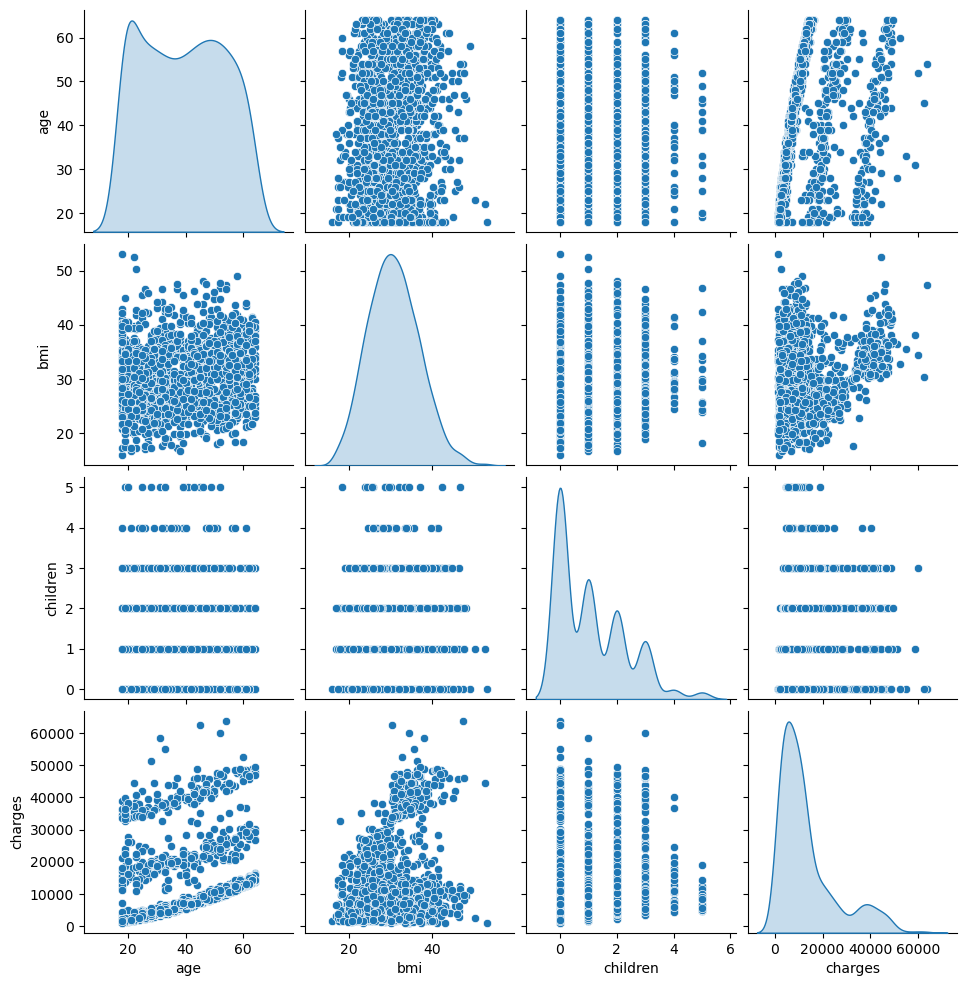

In [95]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [111]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [119]:
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region']) 

In [121]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
   
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')


Training Model LR 
-----------------------------------------------
Score is 0.7833463107364539
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364539
Mean Squared Error: 33635210.431178406
Mean Absolute Error: 4186.508898366435
Training Model DT 
-----------------------------------------------
Score is 0.687180547350622
Training R-squared: 0.9983078124756305
Testing R-squared: 0.687180547350622
Mean Squared Error: 48564823.20976684
Mean Absolute Error: 3105.791343988806
Training Model KNN 
-----------------------------------------------
Score is 0.14450414235747
Training R-squared: 0.39376796951019544
Testing R-squared: 0.14450414235747
Mean Squared Error: 132814646.69546962
Mean Absolute Error: 7953.21049808582


In [145]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364539


In [147]:
from sklearn.preprocessing import PolynomialFeatures


X = df.drop(['charges','region'], axis = 1)
Y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147236


### Linear Regression with Polynomial Feature is the best fit model with 0.88 accuracy score